<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/Talleres/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción:

En este taller, nos embarcaremos en el desafío de detectar y extraer pelotas de colores de una imagen. La detección de colores es un proceso fundamental en el procesamiento de imágenes, y aquí lo abordaremos mediante el uso de máscaras en el espacio de color HSV. El espacio de color HSV nos permite segmentar objetos basados en su tono y saturación, lo que lo hace ideal para diferenciar colores específicos en una imagen.

## 1. Importación de las bibliotecas necesarias:

Antes de comenzar, es esencial importar las bibliotecas que facilitarán el procesamiento de imágenes, la visualización y otras tareas relacionadas.

In [4]:
# Importando las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from google.colab.patches import cv2_imshow
import gdown


# 2. Carga y Visualización de la Imagen Original:

Una vez que las bibliotecas están en su lugar, el siguiente paso es cargar nuestra imagen. Aquí, estamos usando una imagen almacenada en Google Drive. Después de descargarla, la convertimos del espacio de color BGR (predeterminado de OpenCV) a RGB y la visualizamos para tener una idea clara de lo que estamos trabajando.

Downloading...
From: https://drive.google.com/uc?id=110a3kGmypCHt46RDgC9t26sgaOsb3CJW
To: /content/PELOTASLISAS-COLORES.jpg
100%|██████████| 21.5k/21.5k [00:00<00:00, 37.8MB/s]


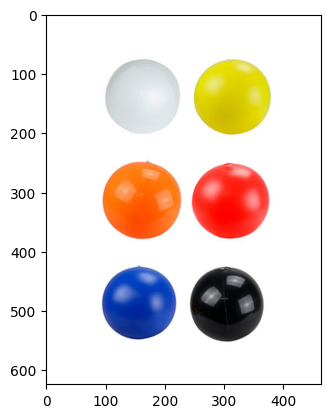

In [5]:
# Descargar la imagen desde Google Drive
url = 'https://drive.google.com/uc?id=110a3kGmypCHt46RDgC9t26sgaOsb3CJW'
output = 'PELOTASLISAS-COLORES.jpg'
gdown.download(url, output, quiet=False)

# Leer y mostrar la imagen
image_original = cv2.imread('PELOTASLISAS-COLORES.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

## 3. Detección y Extracción de Pelotas de Colores:

La detección precisa de colores en una imagen es una tarea fundamental en el procesamiento de imágenes. La capacidad de aislar y reconocer colores específicos se puede aplicar en una variedad de aplicaciones, desde la clasificación de objetos hasta la edición de imágenes avanzada. En este taller, nos enfocamos en detectar y extraer pelotas de colores específicos de una imagen dada.

Procedimiento:

<ol> <li> Conversión a HSV: Transformamos la imagen de RGB a HSV para facilitar la detección de colores, dada la insensibilidad de HSV a variaciones de iluminación.</li>

<li>Especificación de Colores: Definimos intervalos de tono (Hue) para cada color que deseamos detectar, proporcionando un criterio claro para el aislamiento de colores.</li>

<li>Máscaras de Filtrado: Generamos máscaras binarias según los intervalos definidos, aislando así los píxeles que corresponden a cada color en la imagen.</li>

<li>Visualización de Resultados: Mostramos las imágenes resultantes tras aplicar las máscaras, confirmando la correcta identificación de las pelotas por color.</li> </ol>

Se detectó pelota de color red


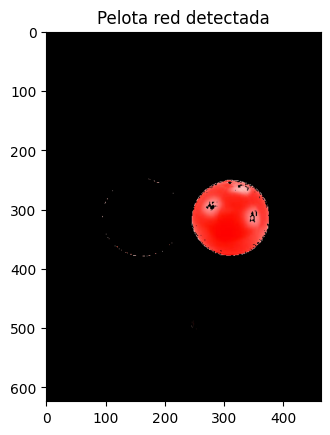

Se detectó pelota de color blue


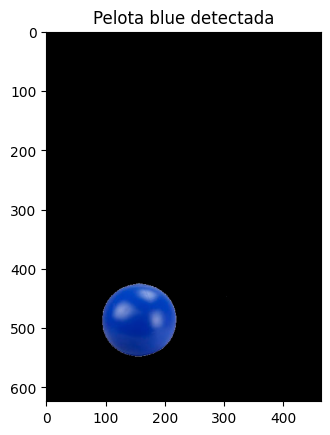

Se detectó pelota de color yellow


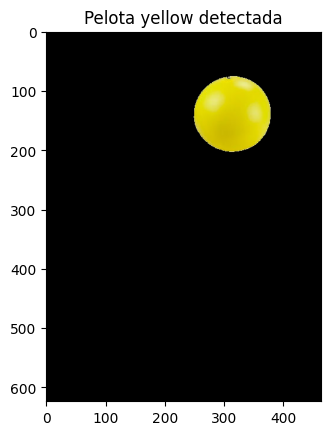

Se detectó pelota de color white


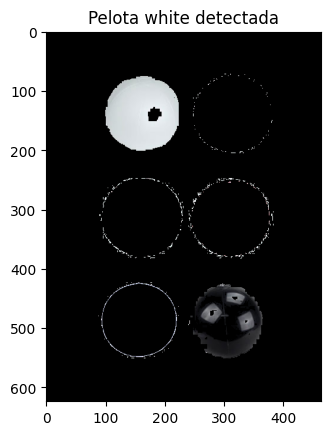

Se detectó pelota de color orange


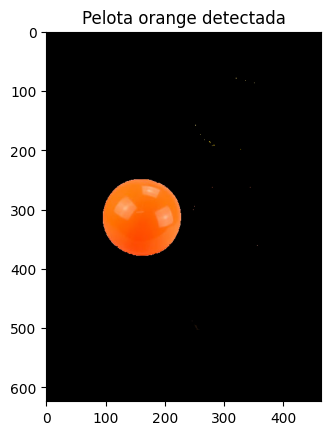

Se detectó pelota de color black


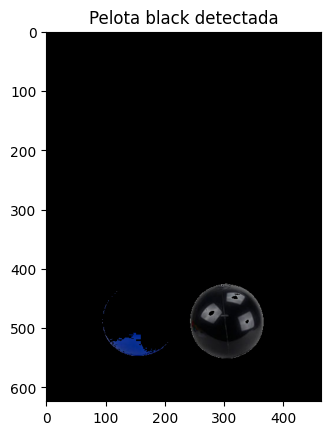

In [6]:
def detect_ball_color(image, lower, upper):
    # Aplicando máscara para el rango de color especificado
    mask = cv2.inRange(image, lower, upper)

    # Encontrando contornos en la máscara
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Si hay contornos, seleccionar el contorno más grande (suponiendo que es la pelota)
        c = max(contours, key=cv2.contourArea)
        return mask, c
    return mask, None

def main():
    # Crear una copia de la imagen original
    img = image_original.copy()

    # Convertir la imagen a formato HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Definiendo rangos de colores para identificar las pelotas
    colors = {
        'red': ([0, 21, 0], [4, 255, 255]),
        'blue': ([100, 50, 50], [140, 255, 255]),
        'yellow': ([20, 50, 50], [40, 255, 255]),
        'white': ([77, 6, 0], [180, 75, 255]),
        'orange': ([5, 100, 20], [25, 255, 255]),
        'black': ([0, 0, 0], [180, 255, 150])
    }

    # Bucle para detectar pelotas según los rangos de colores definidos
    for color, (lower, upper) in colors.items():
        mask, contour = detect_ball_color(hsv, np.array(lower), np.array(upper))

        if contour is not None:
            # Usando la máscara para extraer solo la pelota detectada
            detected_ball = cv2.bitwise_and(img, img, mask=mask)

            # Imprimir el color detectado
            print(f"Se detectó pelota de color {color}")

            # Mostrar la imagen con solo la pelota detectada
            plt.figure()
            plt.imshow(cv2.cvtColor(detected_ball, cv2.COLOR_BGR2RGB))
            plt.title(f"Pelota {color} detectada")
            plt.show()

# Ejecutar la función principal
main()

## 4. Delimitación de las Pelotas Detectadas:

Tras el proceso de identificación de las pelotas basado en su color, se vuelve esencial clarificar su presencia dentro de la imagen original para una interpretación más intuitiva. Esta etapa se centra en delinear y destacar cada pelota identificada, asegurando que su posición, tamaño y forma sean claramente visibles y comprensibles. Al delinear estas áreas de interés, proporcionamos un contexto visual que facilita el análisis y la comprensión de los resultados obtenidos.

Procedimiento:


<ol> <li>Identificación de Contornos: A partir de las máscaras generadas, extraemos los contornos que delinean las áreas detectadas.</li>
<li>Superposición en la Imagen: Sobre la imagen original, superponemos los contornos detectados, destacando así la posición y forma de cada pelota.</li>
<li>Visualización Final: Mostramos la imagen con los contornos superpuestos, proporcionando una vista clara de la ubicación y tamaño de las pelotas identificadas. </li></ol>

Pelota red identificada.
Pelota blue identificada.
Pelota yellow identificada.
Pelota white identificada.
Pelota orange identificada.
Pelota black identificada.


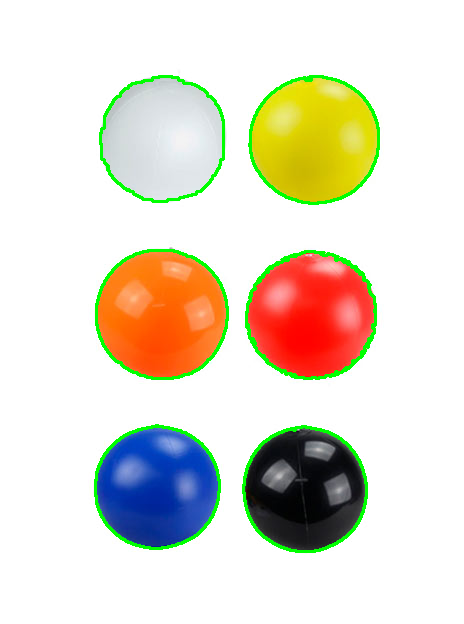

In [7]:
def find_ball_contour(image, lower, upper):
    mask = cv2.inRange(image, lower, upper)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        c = max(contours, key=cv2.contourArea)
        return c
    return None

def highlight_balls():
    # Asegurarse de que image_original esté disponible
    img = image_original.copy()

    # Convertir la imagen a HSV para facilitar la detección de color
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Establecer rangos de color para detectar
    ball_colors = {
        'red': ([0, 21, 0], [4, 255, 255]),
        'blue': ([100, 50, 50], [140, 255, 255]),
        'yellow': ([20, 50, 50], [40, 255, 255]),
        'white': ([77, 6, 0], [180, 75, 255]),
        'orange': ([5, 100, 20], [25, 255, 255]),
        'black': ([0, 0, 0], [180, 255, 150])
    }

    # Buscar y resaltar contornos para cada color
    for color, (lower, upper) in ball_colors.items():
        contour = find_ball_contour(hsv, np.array(lower), np.array(upper))

        if contour is not None:
            cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
            print(f"Pelota {color} identificada.")

    cv2_imshow(img)

# Ejecutar la función para visualizar los contornos
highlight_balls()

Conclusión:

La detección de colores usando el espacio de color HSV es una técnica poderosa que puede adaptarse a una variedad de aplicaciones. En este taller, lo aplicamos para detectar y visualizar pelotas de colores específicos. Es importante notar que la elección del rango de colores en HSV es crítica y puede requerir ajustes según la iluminación y las condiciones de la imagen.